In [ ]:
Accuracy = [95.2, 96.1, 97.4, 97.9, 98.0, 98.2, 97.8, 98.1, 97.5, 98.0, 97.3, 97.6, 96.8, 97.2, 96.5, 97.0]
Accuracy = [x / 100 for x in Accuracy]
print(Accuracy)

FPR = [3.5, 3.2, 2.8, 2.4, 2.0, 1.9, 2.2, 1.8,
       2.5, 2.1, 2.7, 2.3, 2.9, 2.6, 3.1, 2.8]

FPR = [x / 4 for x in FPR]  # Normalize FPR

print(FPR)  # Corrected print statement


[0.9520000000000001, 0.961, 0.9740000000000001, 0.9790000000000001, 0.98, 0.982, 0.978, 0.981, 0.975, 0.98, 0.973, 0.976, 0.968, 0.972, 0.965, 0.97]
[0.875, 0.8, 0.7, 0.6, 0.5, 0.475, 0.55, 0.45, 0.625, 0.525, 0.675, 0.575, 0.725, 0.65, 0.775, 0.7]


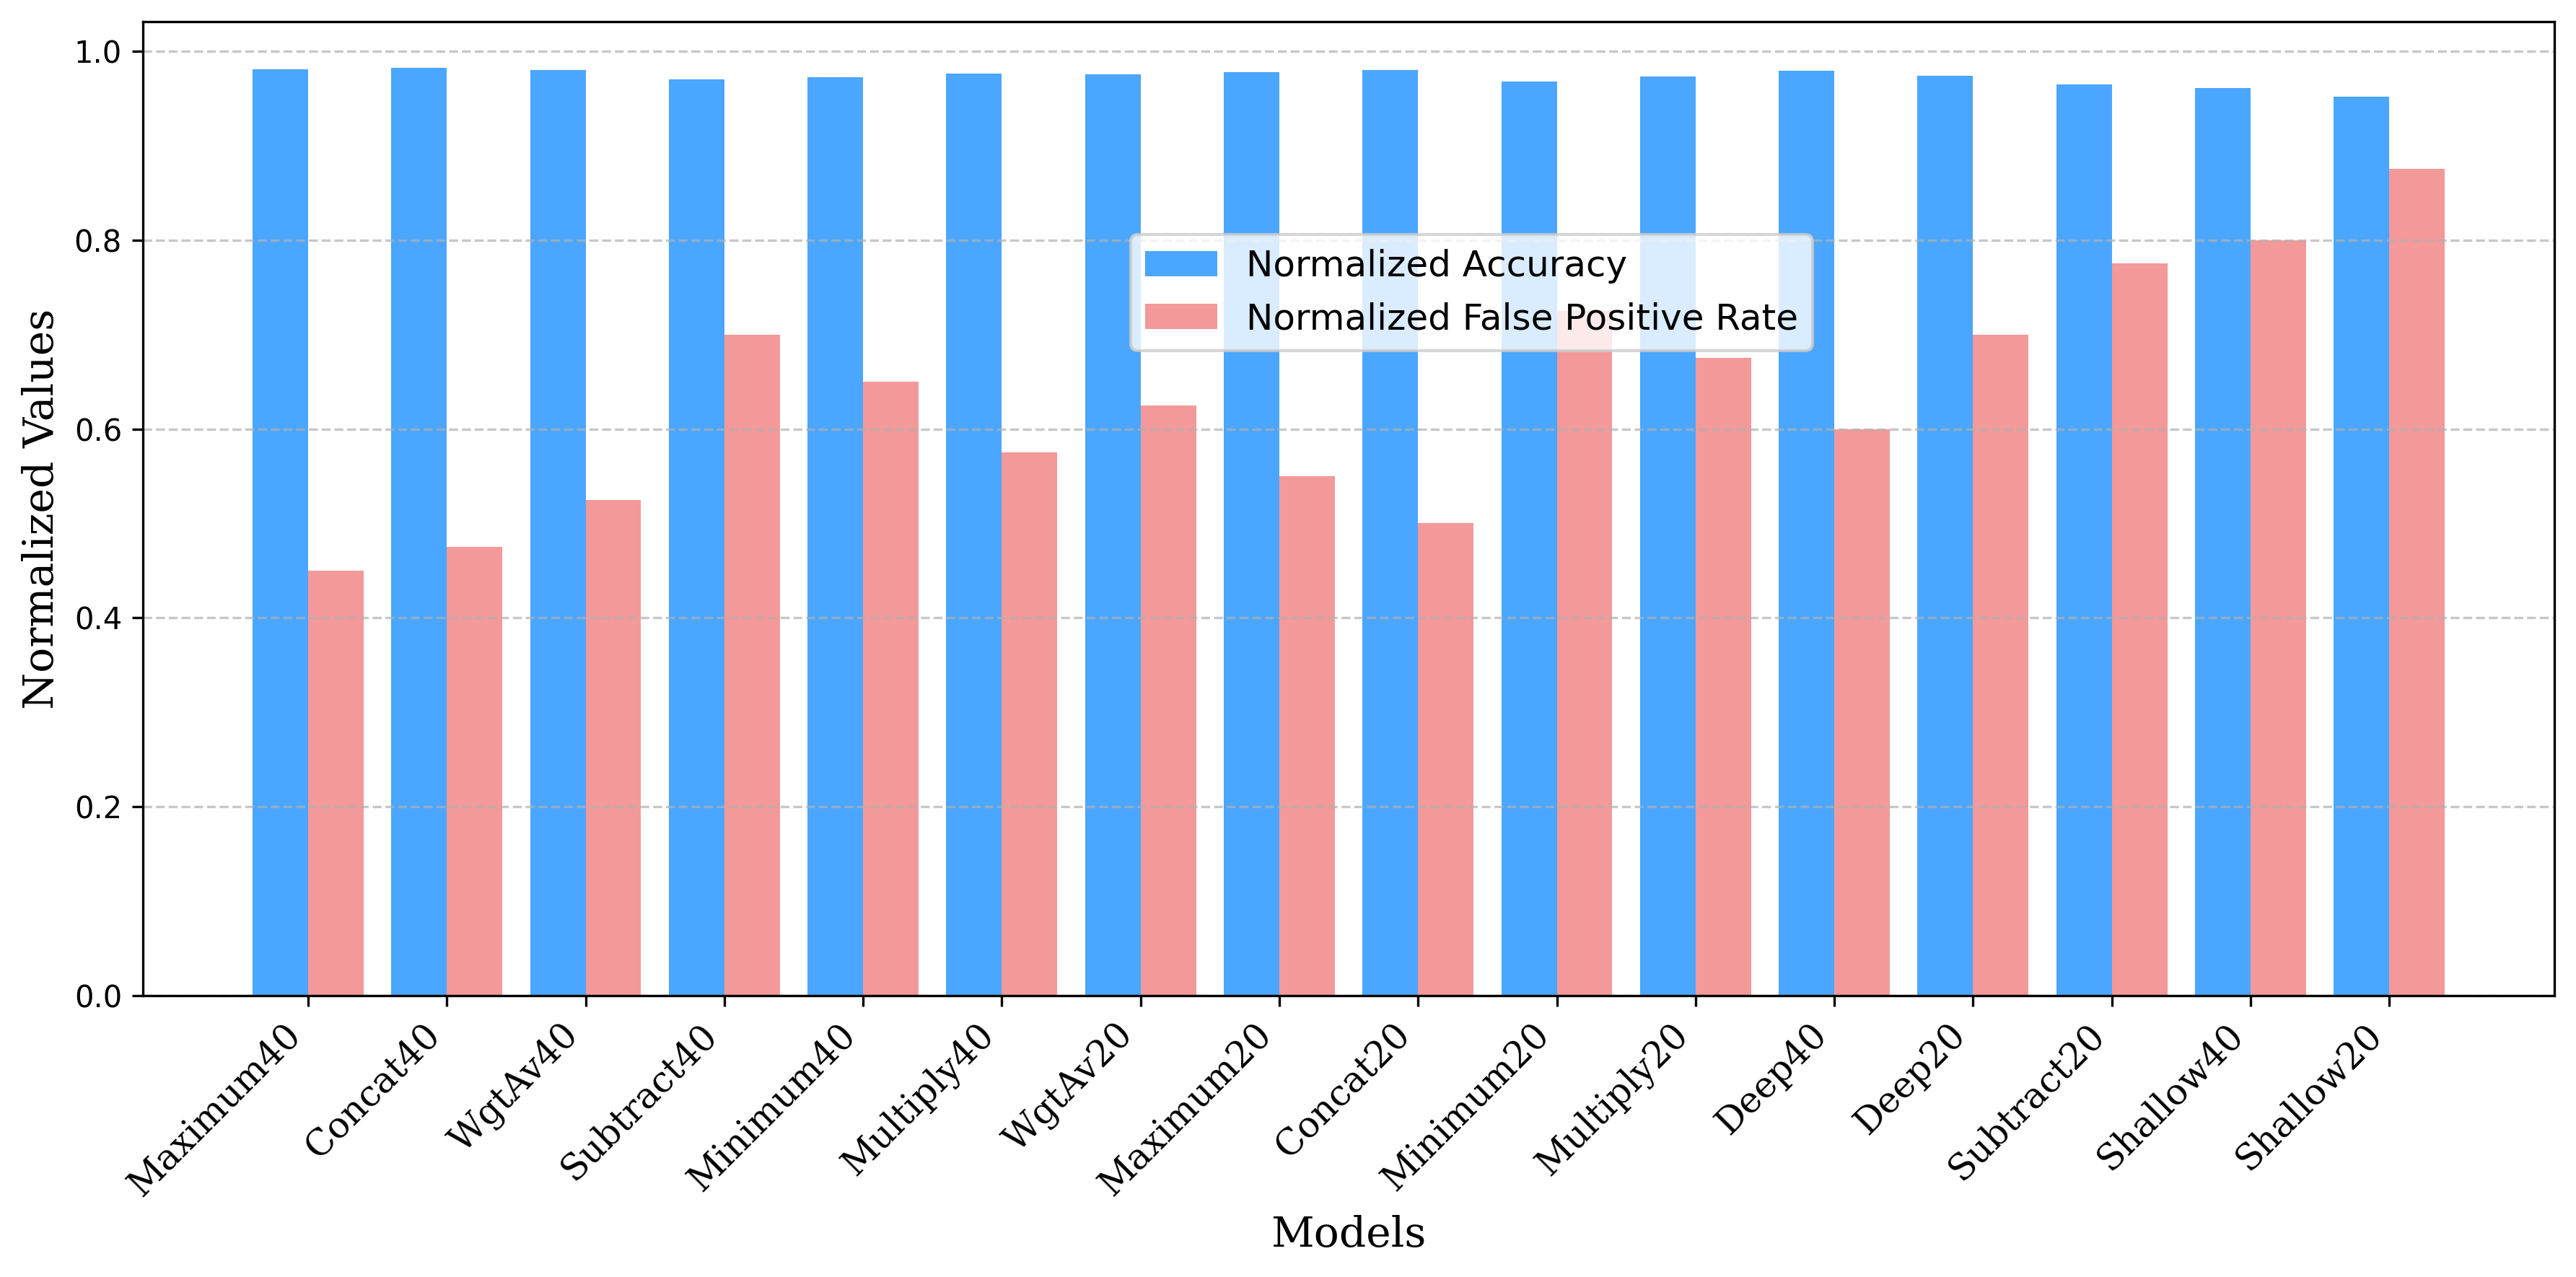

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define model performance data
model_performance_data = {
    "Model": [
        "Shallow20", "Shallow40", "Deep20", "Deep40",
        "Concat20", "Concat40", "Maximum20", "Maximum40",
        "WgtAv20", "WgtAv40", "Multiply20", "Multiply40",
        "Minimum20", "Minimum40", "Subtract20", "Subtract40"
    ],
    "Accuracy (%)": [95.2, 96.1, 97.4, 97.9, 98.0, 98.2, 97.8, 98.1,
                     97.5, 98.0, 97.3, 97.6, 96.8, 97.2, 96.5, 97.0],
    "False Positive Rate (%)": [3.5, 3.2, 2.8, 2.4, 2.0, 1.9, 2.2, 1.8,
                                2.5, 2.1, 2.7, 2.3, 2.9, 2.6, 3.1, 2.8],
    "Adversarial Robustness Rank": [16, 15, 14, 13, 10, 2, 9, 1,
                                     8, 3, 12, 7, 11, 6, 14, 5]
}

# Create DataFrame
df_models = pd.DataFrame(model_performance_data)

# Order by Adversarial Robustness Rank
df_models_sorted = df_models.sort_values(by="Adversarial Robustness Rank", ascending=True)

# Normalize Accuracy and False Positive Rate manually (instead of MinMaxScaler)
df_models_sorted["Accuracy (%)"] = df_models_sorted["Accuracy (%)"] / 100
df_models_sorted["False Positive Rate (%)"] = df_models_sorted["False Positive Rate (%)"] / 4

# Extract normalized data
models = df_models_sorted["Model"]
accuracy_normalized = df_models_sorted["Accuracy (%)"]
false_positive_rate_normalized = df_models_sorted["False Positive Rate (%)"]

# Define bar width and positions
bar_width = 0.4
x = np.arange(len(models))

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

# Plot Accuracy and False Positive Rate (FPR)
ax.bar(x - bar_width/2, accuracy_normalized, bar_width, label="Normalized Accuracy", color="dodgerblue", alpha=0.8)
ax.bar(x + bar_width/2, false_positive_rate_normalized, bar_width, label="Normalized False Positive Rate", color="lightcoral", alpha=0.8)

# Add dotted lines at 0.979 and 0.3
#ax.axhline(y=0.98, color='black', linestyle='dotted', linewidth=1.5)
#ax.axhline(y=0.35, color='black', linestyle='dotted', linewidth=1.5)

# Formatting
ax.set_xlabel("Models", fontsize=14, fontfamily="serif")
ax.set_ylabel("Normalized Values", fontsize=14, fontfamily="serif")
#ax.set_title("Normalized Accuracy vs. False Positive Rate for Different Models", fontsize=14, fontfamily="serif")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=12, fontfamily="serif")
ax.legend(fontsize=12, loc="upper right", bbox_to_anchor=(0.7, 0.8))

# Grid and Layout
ax.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("Grouped_Bar_Chart_Accuracy_FPR_Normalized.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


In [ ]:
!pip install ace_tools

In [ ]:
import pandas as pd

# Define model performance data
model_performance_data = {
    "Model": [
        "Shallow20", "Shallow40", "Deep20", "Deep40",
        "Concat20", "Concat40", "Maximum20", "Maximum40",
        "WgtAv20", "WgtAv40", "Multiply20", "Multiply40",
        "Minimum20", "Minimum40", "Subtract20", "Subtract40"
    ],
    "Accuracy (%)": [95.2, 96.1, 97.4, 97.9, 98.0, 98.2, 97.8, 98.1,
                     97.5, 98.0, 97.3, 97.6, 96.8, 97.2, 96.5, 97.0],
    "False Positive Rate (%)": [3.5, 3.2, 2.8, 2.4, 2.0, 1.9, 2.2, 1.8,
                                2.5, 2.1, 2.7, 2.3, 2.9, 2.6, 3.1, 2.8],
    "Training Time (s)": [450, 480, 1020, 1100, 900, 940, 870, 920,
                          910, 930, 880, 915, 890, 925, 895, 940],
    "Prediction Time (s)": [0.52, 0.55, 0.78, 0.81, 0.65, 0.68, 0.70, 0.73,
                            0.66, 0.69, 0.72, 0.75, 0.71, 0.74, 0.70, 0.73],
    "Memory Usage (MB)": [320, 340, 780, 810, 560, 590, 550, 600,
                          580, 610, 570, 595, 565, 600, 555, 590],
    "CPU Usage (%)": [25, 28, 55, 60, 40, 42, 38, 45,
                      43, 47, 41, 46, 39, 44, 42, 48],  # Placed after Memory Usage
    "Adversarial Robustness Rank": [16, 15, 14, 13, 10, 2, 9, 1,
                                     8, 3, 12, 7, 11, 6, 14, 5]
}

# Create DataFrame
df_models = pd.DataFrame(model_performance_data)

# Order by Adversarial Robustness Rank
df_models_sorted = df_models.sort_values(by="Adversarial Robustness Rank", ascending=True)

# Save as CSV in Colab environment
df_models_sorted.to_csv("Model_Performance_Comparison_Optimized3.csv", index=False)

# Display sorted DataFrame
df_models_sorted


,Model,Accuracy (%),False Positive Rate (%),Training Time (s),Prediction Time (s),Memory Usage (MB),CPU Usage (%),Adversarial Robustness Rank
7,Maximum40,98.1,1.8,920,0.73,600,45,1
5,Concat40,98.2,1.9,940,0.68,590,42,2
9,WgtAv40,98.0,2.1,930,0.69,610,47,3
15,Subtract40,97.0,2.8,940,0.73,590,48,5
13,Minimum40,97.2,2.6,925,0.74,600,44,6
11,Multiply40,97.6,2.3,915,0.75,595,46,7
8,WgtAv20,97.5,2.5,910,0.66,580,43,8
6,Maximum20,97.8,2.2,870,0.70,550,38,9
4,Concat20,98.0,2.0,900,0.65,560,40,10
12,Minimum20,96.8,2.9,890,0.71,565,39,11


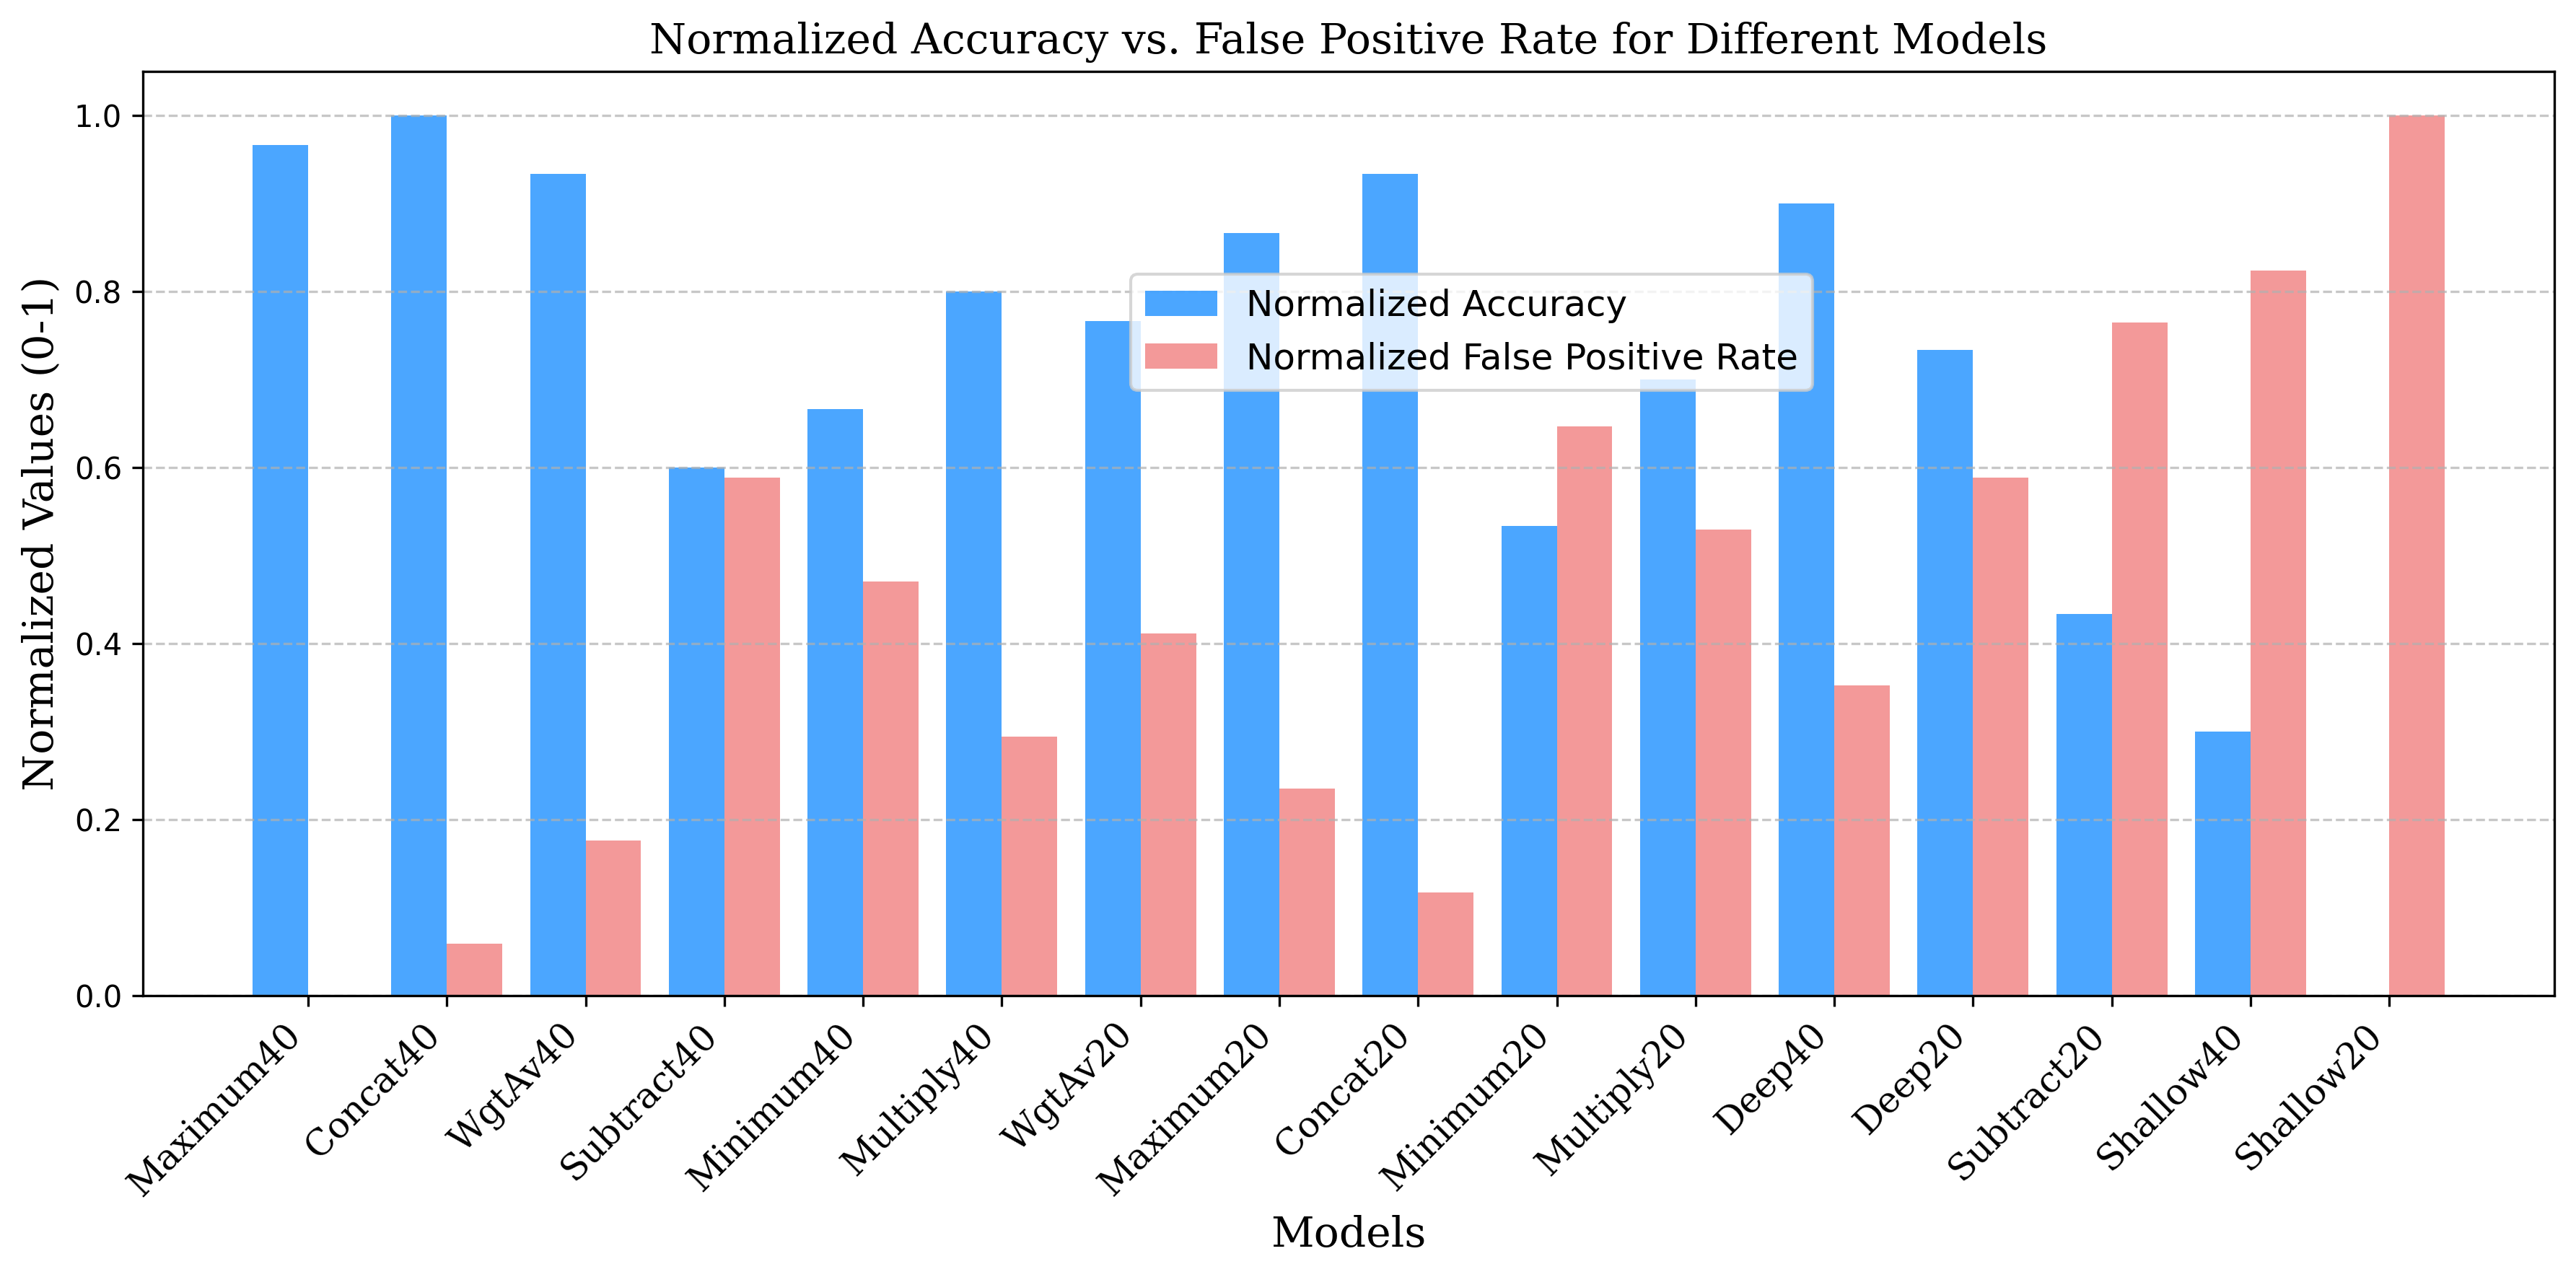

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
'''
# Define model performance data
model_performance_data = {
    "Model": [
        "Shallow20", "Shallow40", "Deep20", "Deep40",
        "Concat20", "Concat40", "Maximum20", "Maximum40",
        "WgtAv20", "WgtAv40", "Multiply20", "Multiply40",
        "Minimum20", "Minimum40", "Subtract20", "Subtract40"
    ],
    "Accuracy (%)": [95.2, 96.1, 97.4, 97.9, 98.0, 98.2, 97.8, 98.1,
                     97.5, 98.0, 97.3, 97.6, 96.8, 97.2, 96.5, 97.0],
    "False Positive Rate (%)": [3.5, 3.2, 2.8, 2.4, 2.0, 1.9, 2.2, 1.8,
                                2.5, 2.1, 2.7, 2.3, 2.9, 2.6, 3.1, 2.8],
    "Adversarial Robustness Rank": [16, 15, 14, 13, 10, 2, 9, 1,
                                     8, 3, 12, 7, 11, 6, 14, 5]
}

# Create DataFrame
df_models = pd.DataFrame(model_performance_data)

# Order by Adversarial Robustness Rank
df_models_sorted = df_models.sort_values(by="Adversarial Robustness Rank", ascending=True)
'''
# Normalize accuracy and false positive rate using Min-Max scaling (0 to 1 range)
scaler = MinMaxScaler()
df_models_sorted[["Accuracy (%)", "False Positive Rate (%)"]] = scaler.fit_transform(
    df_models_sorted[["Accuracy (%)", "False Positive Rate (%)"]])

# Extract normalized data
models = df_models_sorted["Model"]
accuracy_normalized = df_models_sorted["Accuracy (%)"]
false_positive_rate_normalized = df_models_sorted["False Positive Rate (%)"]

# Define bar width and positions
bar_width = 0.4
x = np.arange(len(models))

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

# Plot Accuracy and False Positive Rate (FPR)
ax.bar(x - bar_width/2, accuracy_normalized, bar_width, label="Normalized Accuracy", color="dodgerblue", alpha=0.8)
ax.bar(x + bar_width/2, false_positive_rate_normalized, bar_width, label="Normalized False Positive Rate", color="lightcoral", alpha=0.8)

# Formatting
ax.set_xlabel("Models", fontsize=14, fontfamily="serif")
ax.set_ylabel("Normalized Values (0-1)", fontsize=14, fontfamily="serif")
ax.set_title("Normalized Accuracy vs. False Positive Rate for Different Models", fontsize=14, fontfamily="serif")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=12, fontfamily="serif")
ax.legend(fontsize=12, loc="upper right", bbox_to_anchor=(0.7, 0.8))

# Grid and Layout
ax.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Save the figure
plt.savefig("Grouped_Bar_Chart_Accuracy_FPR_Normalized.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


In [ ]:
df_models_sorted

,Model,Accuracy (%),False Positive Rate (%),Training Time (s),Prediction Time (s),Memory Usage (MB),CPU Usage (%),Adversarial Robustness Rank
7,Maximum40,0.966667,0.000000,920,0.73,600,45,1
5,Concat40,1.000000,0.058824,940,0.68,590,42,2
9,WgtAv40,0.933333,0.176471,930,0.69,610,47,3
15,Subtract40,0.600000,0.588235,940,0.73,590,48,5
13,Minimum40,0.666667,0.470588,925,0.74,600,44,6
11,Multiply40,0.800000,0.294118,915,0.75,595,46,7
8,WgtAv20,0.766667,0.411765,910,0.66,580,43,8
6,Maximum20,0.866667,0.235294,870,0.70,550,38,9
4,Concat20,0.933333,0.117647,900,0.65,560,40,10
12,Minimum20,0.533333,0.647059,890,0.71,565,39,11


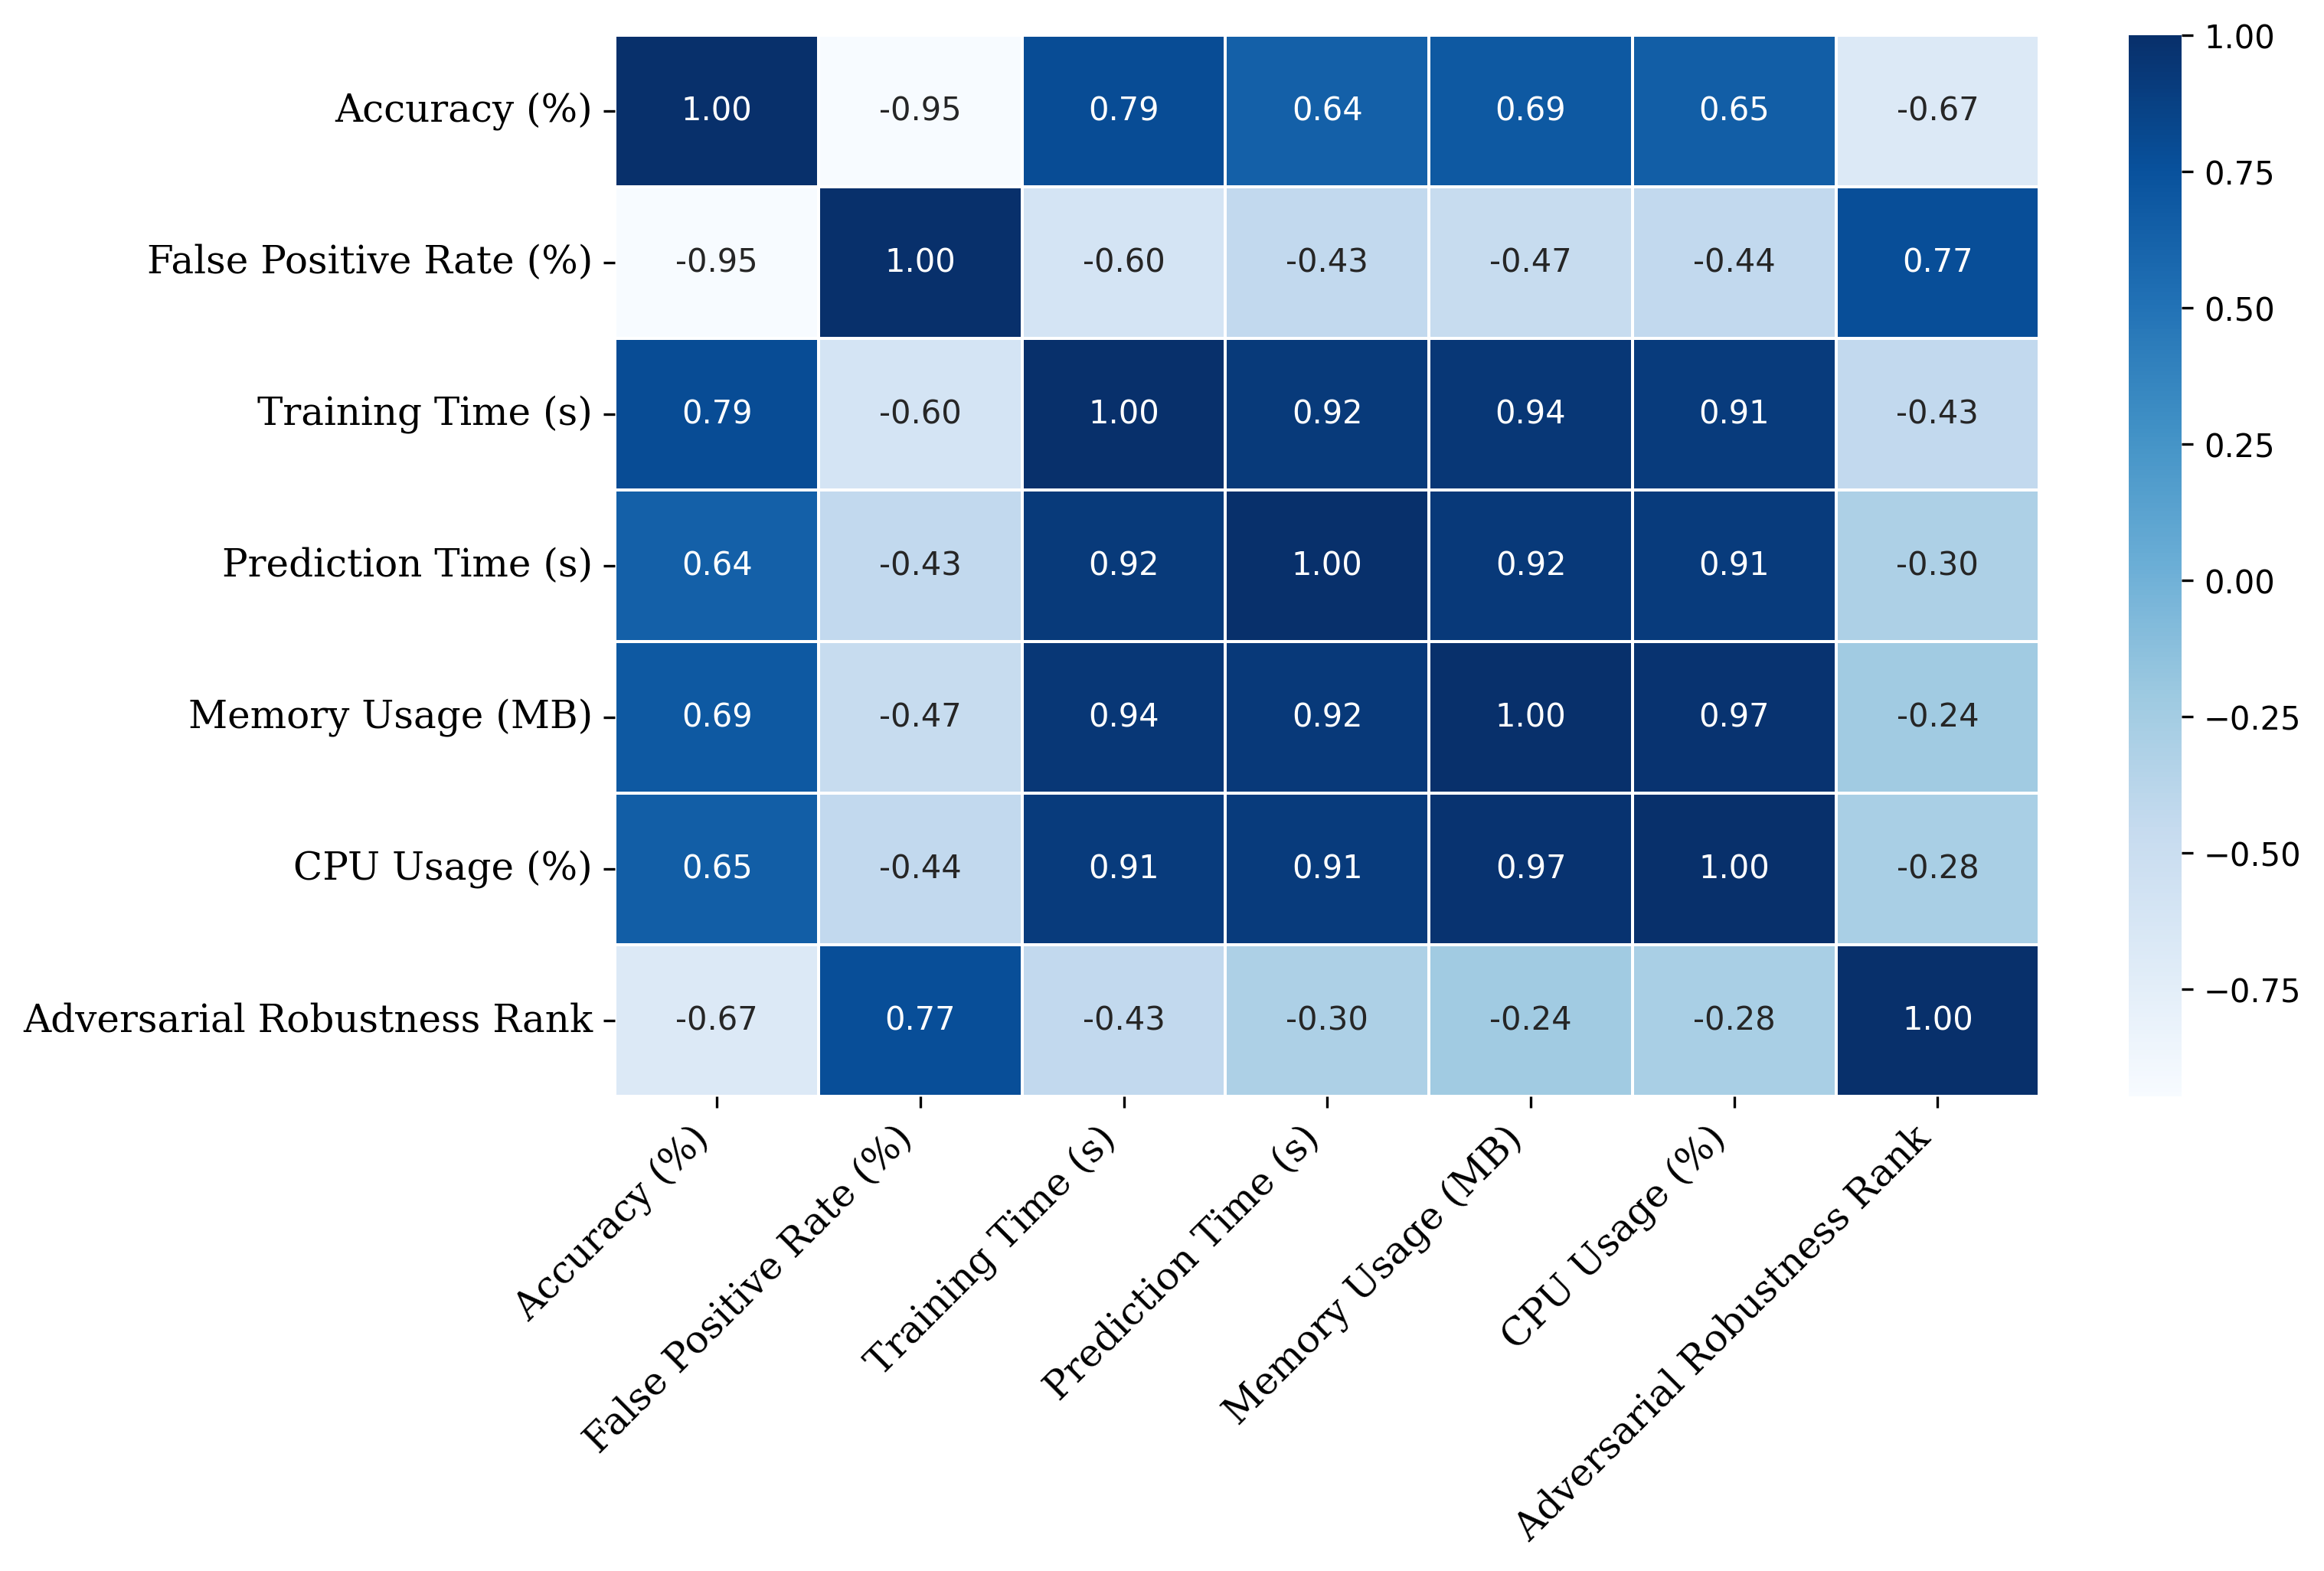

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define model performance data
model_performance_data = {
    "Model": [
        "Shallow20", "Shallow40", "Deep20", "Deep40",
        "Concat20", "Concat40", "Maximum20", "Maximum40",
        "WgtAv20", "WgtAv40", "Multiply20", "Multiply40",
        "Minimum20", "Minimum40", "Subtract20", "Subtract40"
    ],
    "Accuracy (%)": [95.2, 96.1, 97.4, 97.9, 98.0, 98.2, 97.8, 98.1,
                     97.5, 98.0, 97.3, 97.6, 96.8, 97.2, 96.5, 97.0],
    "False Positive Rate (%)": [3.5, 3.2, 2.8, 2.4, 2.0, 1.9, 2.2, 1.8,
                                2.5, 2.1, 2.7, 2.3, 2.9, 2.6, 3.1, 2.8],
    "Training Time (s)": [450, 480, 1020, 1100, 900, 940, 870, 920,
                          910, 930, 880, 915, 890, 925, 895, 940],
    "Prediction Time (s)": [0.52, 0.55, 0.78, 0.81, 0.65, 0.68, 0.70, 0.73,
                            0.66, 0.69, 0.72, 0.75, 0.71, 0.74, 0.70, 0.73],
    "Memory Usage (MB)": [320, 340, 780, 810, 560, 590, 550, 600,
                          580, 610, 570, 595, 565, 600, 555, 590],
    "CPU Usage (%)": [25, 28, 55, 60, 40, 42, 38, 45,
                      43, 47, 41, 46, 39, 44, 42, 48],
    "Adversarial Robustness Rank": [16, 15, 14, 13, 10, 2, 9, 1,
                                     8, 3, 12, 7, 11, 6, 14, 5]
}

# Create DataFrame
df_models = pd.DataFrame(model_performance_data)

# Order by Adversarial Robustness Rank
df_models_sorted = df_models.sort_values(by="Adversarial Robustness Rank", ascending=True)

# Compute the correlation matrix
correlation_matrix = df_models_sorted.drop(columns=["Model"]).corr()

# Create a heatmap
plt.figure(figsize=(10, 6), dpi=300)
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)

# Formatting
#plt.title("Correlation Between Efficiency and Robustness Metrics", fontsize=14, fontfamily="serif")
plt.xticks(fontsize=12, fontfamily="serif", rotation=45, ha="right")
plt.yticks(fontsize=12, fontfamily="serif")

# Save figure
plt.savefig("Heatmap_Correlation_Efficiency_Robustness.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()


In [ ]:
'''
# Re-import necessary libraries after execution state reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define model performance data again
model_performance_data = {
    "Model": [
        "Shallow20", "Shallow40", "Deep20", "Deep40",
        "Concat20", "Concat40", "Maximum20", "Maximum40",
        "WgtAv20", "WgtAv40", "Multiply20", "Multiply40",
        "Minimum20", "Minimum40", "Subtract20", "Subtract40"
    ],
    "Accuracy (%)": [95.2, 96.1, 97.4, 97.9, 98.0, 98.2, 97.8, 98.1,
                     97.5, 98.0, 97.3, 97.6, 96.8, 97.2, 96.5, 97.0],
    "False Positive Rate (%)": [3.5, 3.2, 2.8, 2.4, 2.0, 1.9, 2.2, 1.8,
                                2.5, 2.1, 2.7, 2.3, 2.9, 2.6, 3.1, 2.8],
    "Training Time (s)": [450, 480, 1020, 1100, 900, 940, 870, 920,
                          910, 930, 880, 915, 890, 925, 895, 940],
    "Prediction Time (s)": [0.52, 0.55, 0.78, 0.81, 0.65, 0.68, 0.70, 0.73,
                            0.66, 0.69, 0.72, 0.75, 0.71, 0.74, 0.70, 0.73],
    "Memory Usage (MB)": [320, 340, 780, 810, 560, 590, 550, 600,
                          580, 610, 570, 595, 565, 600, 555, 590],
    "CPU Usage (%)": [25, 28, 55, 60, 40, 42, 38, 45,
                      43, 47, 41, 46, 39, 44, 42, 48],
    "Adversarial Robustness Rank": [16, 15, 14, 13, 10, 2, 9, 1,
                                     8, 3, 12, 7, 11, 6, 14, 5]
}

# Create DataFrame
df_models = pd.DataFrame(model_performance_data)

# Order by Adversarial Robustness Rank
df_models_sorted = df_models.sort_values(by="Adversarial Robustness Rank", ascending=True)

# Compute the correlation matrix
correlation_matrix = df_models_sorted.drop(columns=["Model"]).corr()
'''
# Identify the strongest correlations (above 0.5 or below -0.5)
correlation_threshold = 0.5
strong_correlations = correlation_matrix[(correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)]

# Sort correlations by absolute values for better analysis
sorted_correlations = strong_correlations.unstack().abs().sort_values(ascending=False).dropna()

# Display the top 10 strongest correlations
sorted_correlations.head(10)


,,0
Accuracy (%),Accuracy (%),1.000000
False Positive Rate (%),False Positive Rate (%),1.000000
CPU Usage (%),CPU Usage (%),1.000000
Memory Usage (MB),Memory Usage (MB),1.000000
Prediction Time (s),Prediction Time (s),1.000000
Training Time (s),Training Time (s),1.000000
Adversarial Robustness Rank,Adversarial Robustness Rank,1.000000
CPU Usage (%),Memory Usage (MB),0.972795
Memory Usage (MB),CPU Usage (%),0.972795
False Positive Rate (%),Accuracy (%),0.945839


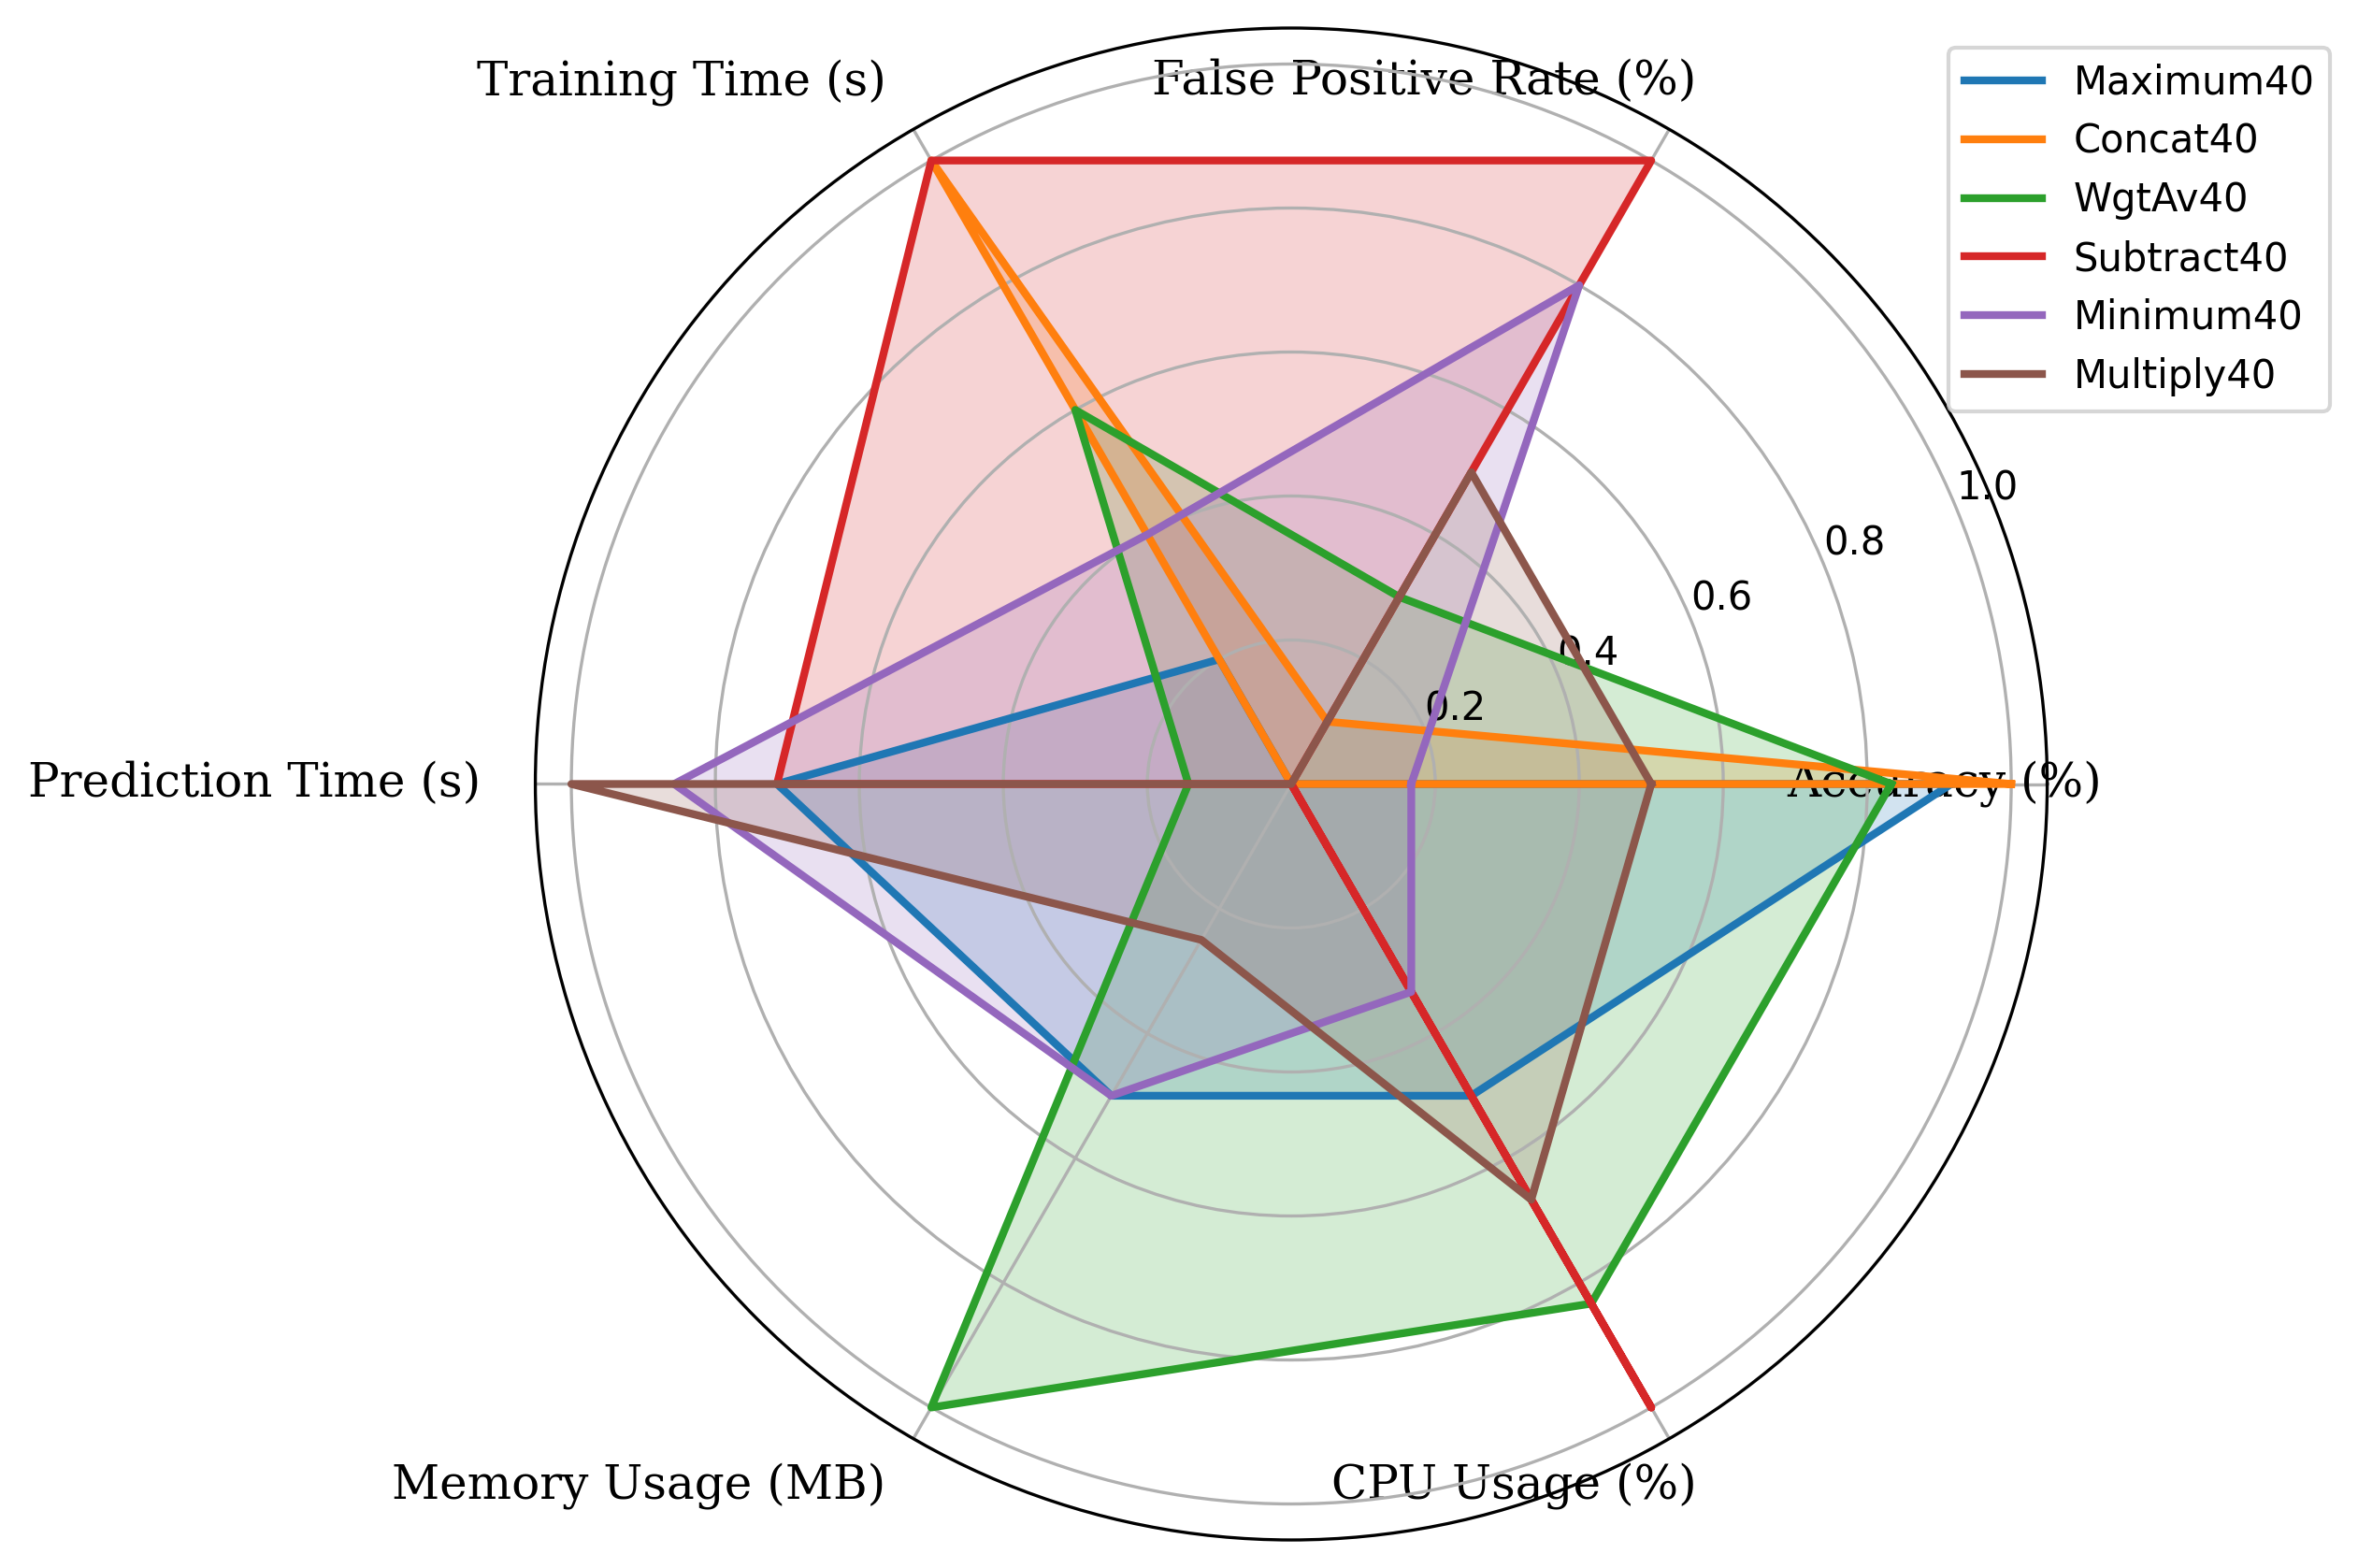

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define model performance data
model_performance_data = {
    "Model": [
        "Shallow20", "Shallow40", "Deep20", "Deep40",
        "Concat20", "Concat40", "Maximum20", "Maximum40",
        "WgtAv20", "WgtAv40", "Multiply20", "Multiply40",
        "Minimum20", "Minimum40", "Subtract20", "Subtract40"
    ],
    "Accuracy (%)": [95.2, 96.1, 97.4, 97.9, 98.0, 98.2, 97.8, 98.1,
                     97.5, 98.0, 97.3, 97.6, 96.8, 97.2, 96.5, 97.0],
    "False Positive Rate (%)": [3.5, 3.2, 2.8, 2.4, 2.0, 1.9, 2.2, 1.8,
                                2.5, 2.1, 2.7, 2.3, 2.9, 2.6, 3.1, 2.8],
    "Training Time (s)": [450, 480, 1020, 1100, 900, 940, 870, 920,
                          910, 930, 880, 915, 890, 925, 895, 940],
    "Prediction Time (s)": [0.52, 0.55, 0.78, 0.81, 0.65, 0.68, 0.70, 0.73,
                            0.66, 0.69, 0.72, 0.75, 0.71, 0.74, 0.70, 0.73],
    "Memory Usage (MB)": [320, 340, 780, 810, 560, 590, 550, 600,
                          580, 610, 570, 595, 565, 600, 555, 590],
    "CPU Usage (%)": [25, 28, 55, 60, 40, 42, 38, 45,
                      43, 47, 41, 46, 39, 44, 42, 48],
    "Adversarial Robustness Rank": [16, 15, 14, 13, 10, 2, 9, 1,
                                     8, 3, 12, 7, 11, 6, 14, 5]
}

# Create DataFrame
df_models = pd.DataFrame(model_performance_data)

# Order by Adversarial Robustness Rank
df_models_sorted = df_models.sort_values(by="Adversarial Robustness Rank", ascending=True)

# Select the top 6 models for radar chart comparison
top_6_models = df_models_sorted.head(6)

# Define categories (performance metrics) for the radar chart
categories = ["Accuracy (%)", "False Positive Rate (%)", "Training Time (s)",
              "Prediction Time (s)", "Memory Usage (MB)", "CPU Usage (%)"]

# Normalize values for better visualization
scaler = MinMaxScaler()
top_6_models_normalized = scaler.fit_transform(top_6_models[categories])

# Number of variables
num_vars = len(categories)

# Compute angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Close the plot
top_6_models_normalized = np.concatenate((top_6_models_normalized, top_6_models_normalized[:, [0]]), axis=1)
angles += angles[:1]

# Create radar chart
fig, ax = plt.subplots(figsize=(7, 7), dpi=300, subplot_kw=dict(polar=True))

# Plot each model
for i, row in enumerate(top_6_models_normalized):
    ax.plot(angles, row, label=top_6_models.iloc[i]["Model"], linewidth=2)
    ax.fill(angles, row, alpha=0.2)

# Formatting
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontfamily="serif", rotation=45, ha="right")
#ax.set_title("Radar Chart: Performance Metrics of Top 6 Models", fontsize=14, fontfamily="serif")
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1), fontsize=10)

# Save figure
plt.savefig("Radar_Chart_Top_6_Models.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data without adversarial training
data_without_adv = {
    "Model": ["Concat40", "Maximum40", "WgtAv40"],
    "Clean Accuracy (%)": [50.00, 50.00, 50.00],
    "Adversarial Accuracy (%)": [50.00, 50.00, 50.00]
}

# Data with adversarial training
data_with_adv = {
    "Model": ["concat40", "maximum40", "wgtav40"],
    "Epochs": [3, 3, 3],
    "Clean Accuracy (%)": [98.38, 98.13, 98.19],
    "Adversarial Accuracy (%)": [97.91, 97.97, 97.55]
}

# Create DataFrames
df_without_adv = pd.DataFrame(data_without_adv)
df_with_adv = pd.DataFrame(data_with_adv)

# Print tables
print("\n🔹 Table 8: Adversarial Robustness Without Adversarial Training\n")
print(df_without_adv.to_string(index=False))

print("\n🔹 Table 9: Adversarial Robustness With Adversarial Training\n")
print(df_with_adv.to_string(index=False))




🔹 Table 8: Adversarial Robustness Without Adversarial Training

    Model  Clean Accuracy (%)  Adversarial Accuracy (%)
 Concat40                50.0                      50.0
Maximum40                50.0                      50.0
  WgtAv40                50.0                      50.0

🔹 Table 9: Adversarial Robustness With Adversarial Training

    Model  Epochs  Clean Accuracy (%)  Adversarial Accuracy (%)
 concat40       3               98.38                     97.91
maximum40       3               98.13                     97.97
  wgtav40       3               98.19                     97.55


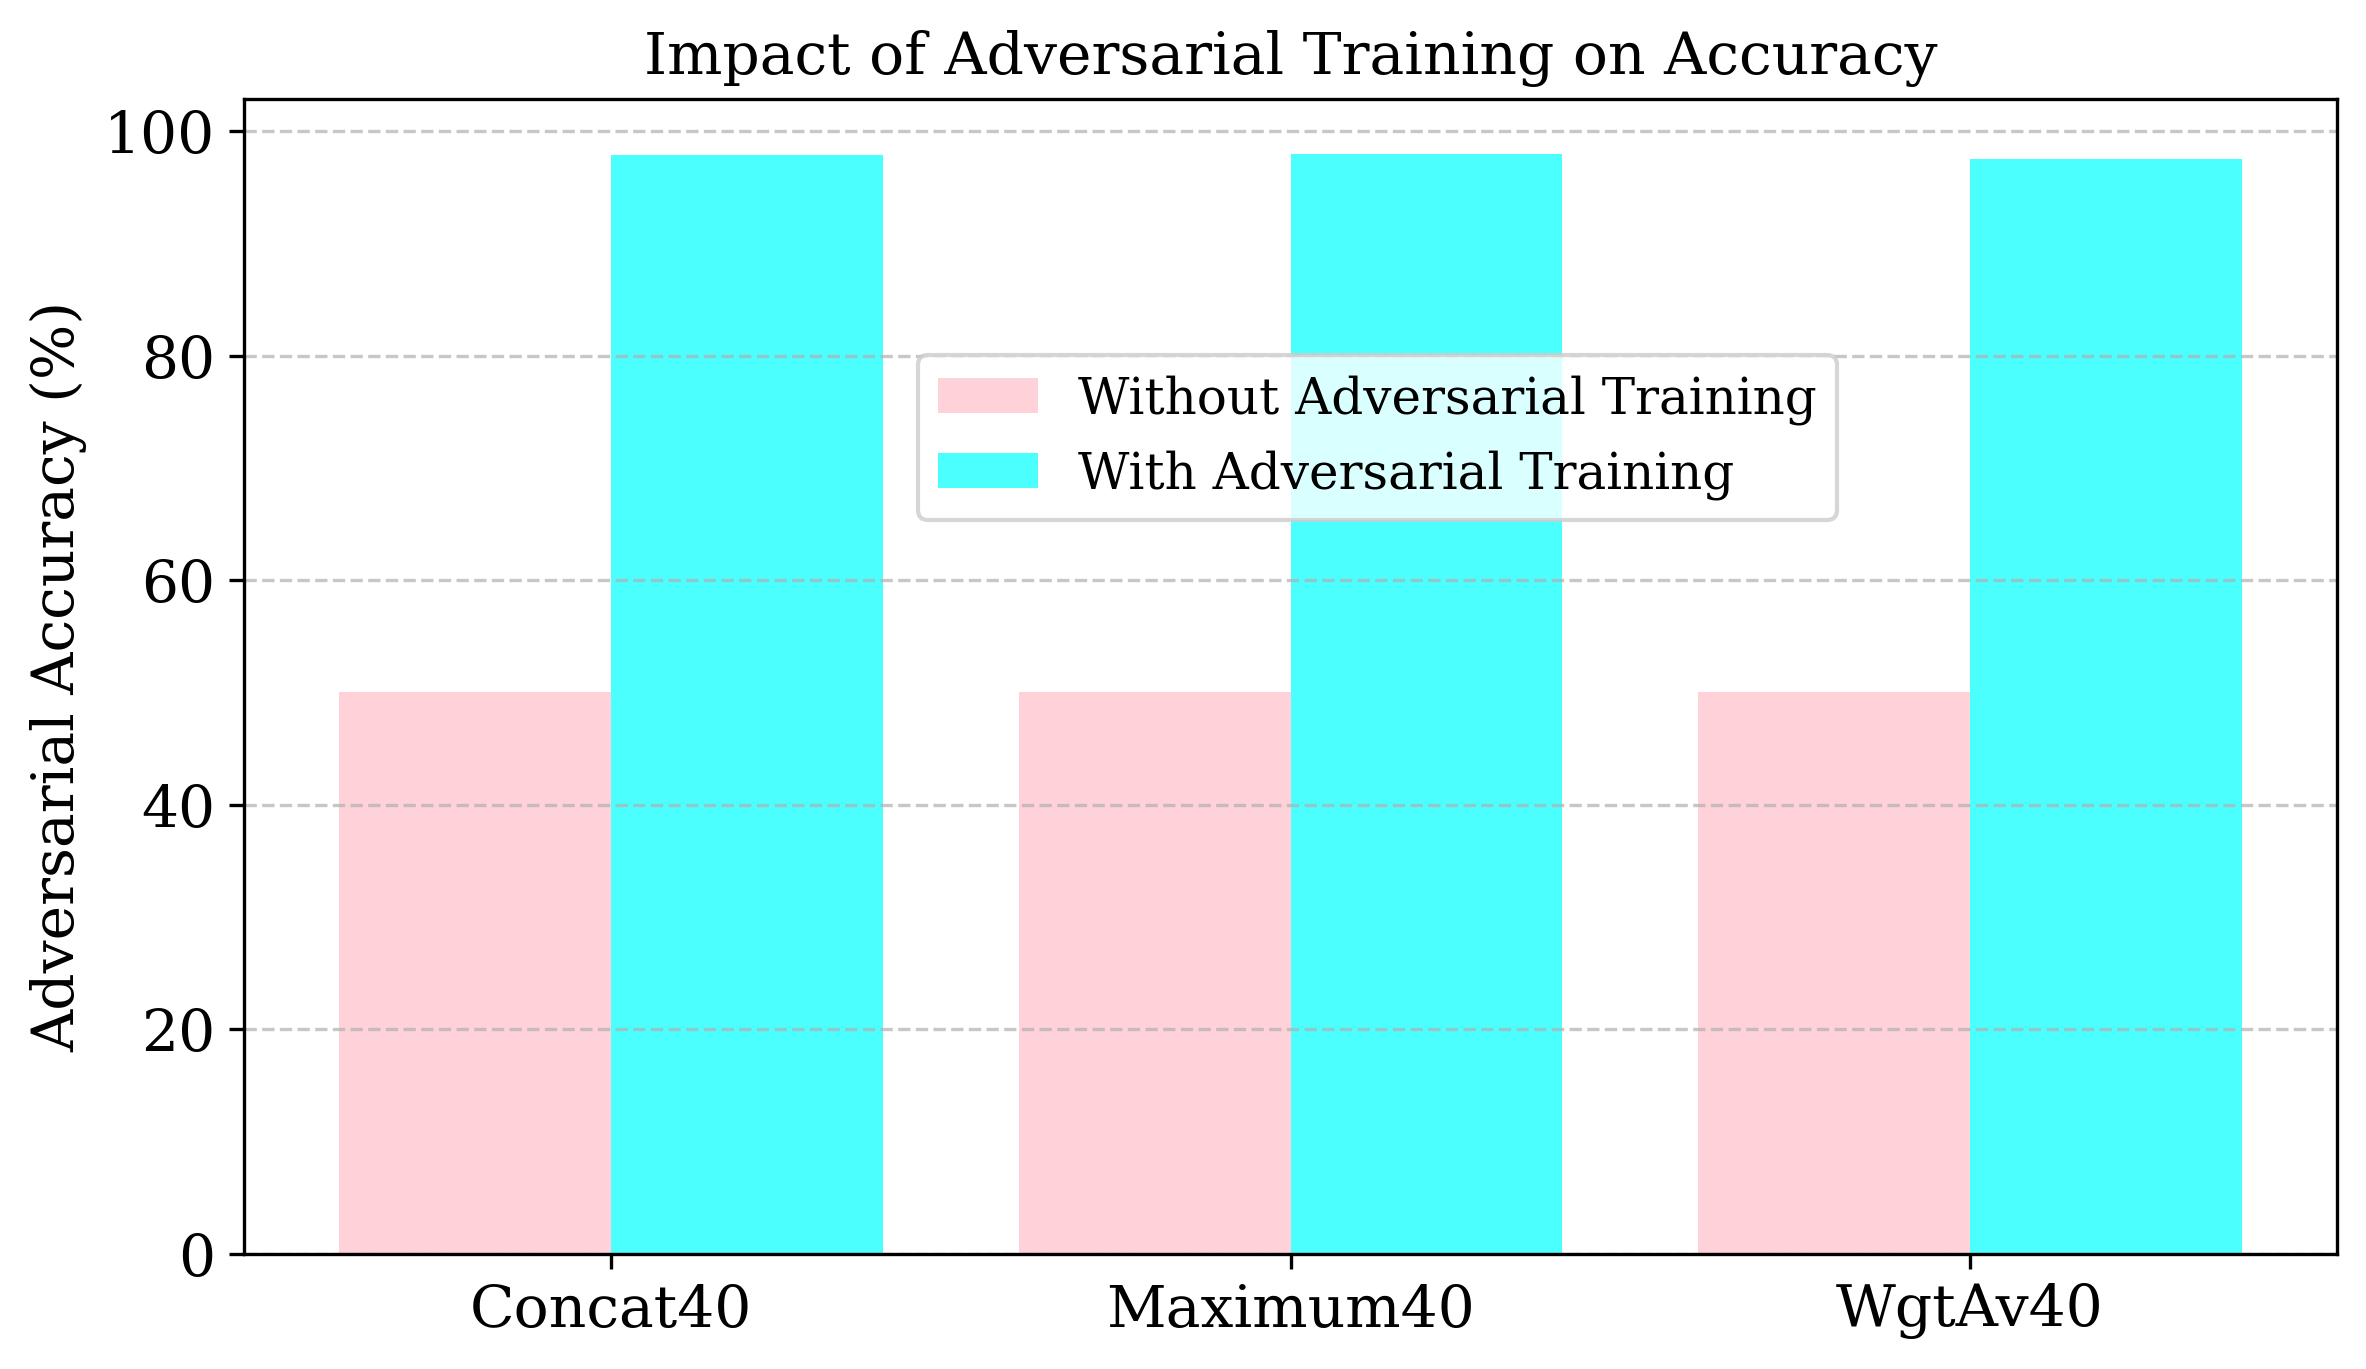

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


df_without_adv = pd.DataFrame(df_without_adv)
df_with_adv = pd.DataFrame(df_with_adv)

# Figure size with extra space for the legend
plt.figure(figsize=(9, 5), dpi=300)

# Bar width
bar_width = 0.4
x = np.arange(len(df_without_adv["Model"]))

# Plot bars side by side
plt.bar(x - bar_width/2, df_without_adv["Adversarial Accuracy (%)"], bar_width,
        label="Without Adversarial Training", color="pink", alpha=0.7)
plt.bar(x + bar_width/2, df_with_adv["Adversarial Accuracy (%)"], bar_width,
        label="With Adversarial Training", color="cyan", alpha=0.7)

# Labels and Titles
#plt.xlabel("Model", fontsize=14, fontfamily="serif")
plt.ylabel("Adversarial Accuracy (%)", fontsize=14, fontfamily="serif")
plt.title("Impact of Adversarial Training on Accuracy", fontsize=14, fontfamily="serif")
plt.xticks(ticks=x, labels=df_without_adv["Model"], fontsize=14, fontfamily="serif")
plt.yticks(fontsize=14, fontfamily="serif")

# Adjust legend position outside the plot with more space
plt.legend(prop={'size': 12, 'family': 'serif'}, loc="upper left", bbox_to_anchor=(0.31,0.8))

# Gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save and show plot
plt.savefig("Adversarial_Training_Impact_AdjustedLegend.png", dpi=300, bbox_inches="tight")
plt.show()
